<a href="https://colab.research.google.com/github/sli782/DC/blob/main/data_challenge_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *PART 1*
#### Bank of America (BAC), Goldman Sachs (GS), JpMorgan Chase(JPM), Morgan Stanley(MS), Wells Fargo(WFC) since 2000 to date.
#### 2. Install and load API

In [ ]:
!pip install yfinance 
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

####3.  Create a dataframe for all banks and load them.

In [ ]:
tickers = ["BAC", "GS", "JPM", "MS", "WFC"]
stockDF = yf.download(tickers, start="2000-01-01")
stockDF

[*********************100%***********************]  5 of 5 completed


Adj Close                          ...    Volume                   
                  BAC          GS         JPM  ...       JPM       MS       WFC
Date                                           ...                             
2000-01-03  13.893577   68.596458   25.715622  ...  12019200  5309000   9037000
2000-01-04  13.068926   64.275795   25.151373  ...  11723400  6234400  15237200
2000-01-05  13.212340   61.265915   24.996122  ...   8714550  7744200   8228200
2000-01-06  14.341758   63.887451   25.351000  ...   8369250  6586000   8326800
2000-01-07  13.965284   64.130188   25.816750  ...   6571950  6324800   7711200
...               ...         ...         ...  ...       ...      ...       ...
2021-07-30  38.360001  374.880005  151.779999  ...   9804600  8320200  25792500
2021-08-02  37.959999  378.190002  151.169998  ...  10203200  9409600  23960700
2021-08-03  38.549999  380.359985  152.889999  ...  10386600  7042600  24041400
2021-08-04  38.270000  377.859985  151.240005  ...  10154000  7137500  22175500
2021-08-05  38.904999  382.709412  153.005005  ...   4188720  2525780  13613478

[5433 rows x 30 columns]

In [ ]:
## Bank of Amercia stock info
BAC = stockDF.xs('BAC', level=1, axis=1)

##  Goldman Sachs stock info
GS =  stockDF.xs('GS', level=1, axis=1)

## JpMorgan Chase
JPM = stockDF.xs('JPM', level=1, axis=1)

## Morgan Stanley
MS = stockDF.xs('MS', level=1, axis=1)

## Wells Fargo
WFC = stockDF.xs('WFC', level=1, axis=1)

In [ ]:
WFC

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2000-01-03,10.768756,19.562500,20.187500,19.000000,20.156250,9037000
2000-01-04,10.235478,18.593750,18.843750,18.000000,18.625000,15237200
2000-01-05,10.132262,18.406250,18.875000,18.031250,18.500000,8228200
2000-01-06,10.579529,19.218750,19.500000,18.468750,18.531250,8326800
2000-01-07,10.768756,19.562500,19.843750,19.281250,19.625000,7711200
...,...,...,...,...,...,...
2021-07-30,45.939999,45.939999,46.849998,45.730000,46.259998,25792500
2021-08-02,45.790001,45.790001,46.810001,45.570000,46.040001,23960700
2021-08-03,46.830002,46.830002,46.939999,45.110001,45.980000,24041400


In [ ]:
closeDF = pd.DataFrame(BAC['Close'])
closeDF['GS'] =  pd.DataFrame(GS['Close'])
closeDF['JPM'] =  pd.DataFrame(JPM['Close'])
closeDF['MS'] =  pd.DataFrame(MS['Close'])
closeDF['WFC'] =  pd.DataFrame(WFC['Close'])
closeDF.columns = tickers
closeDF

,BAC,GS,JPM,MS,WFC
Date,,,,,
2000-01-03,24.218750,88.312500,48.583332,67.500000,19.562500
2000-01-04,22.781250,82.750000,47.250000,62.500000,18.593750
2000-01-05,23.031250,78.875000,46.958332,60.218750,18.406250
2000-01-06,25.000000,82.250000,47.625000,61.375000,19.218750
2000-01-07,24.343750,82.562500,48.500000,63.281250,19.562500
...,...,...,...,...,...
2021-07-30,38.360001,374.880005,151.779999,95.980003,45.939999
2021-08-02,37.959999,378.190002,151.169998,96.230003,45.790001
2021-08-03,38.549999,380.359985,152.889999,96.599998,46.830002


## *Part 2*
#### 4. Plot moving average (30 day, 100 day, and 200 day) and daily close price for each bank.

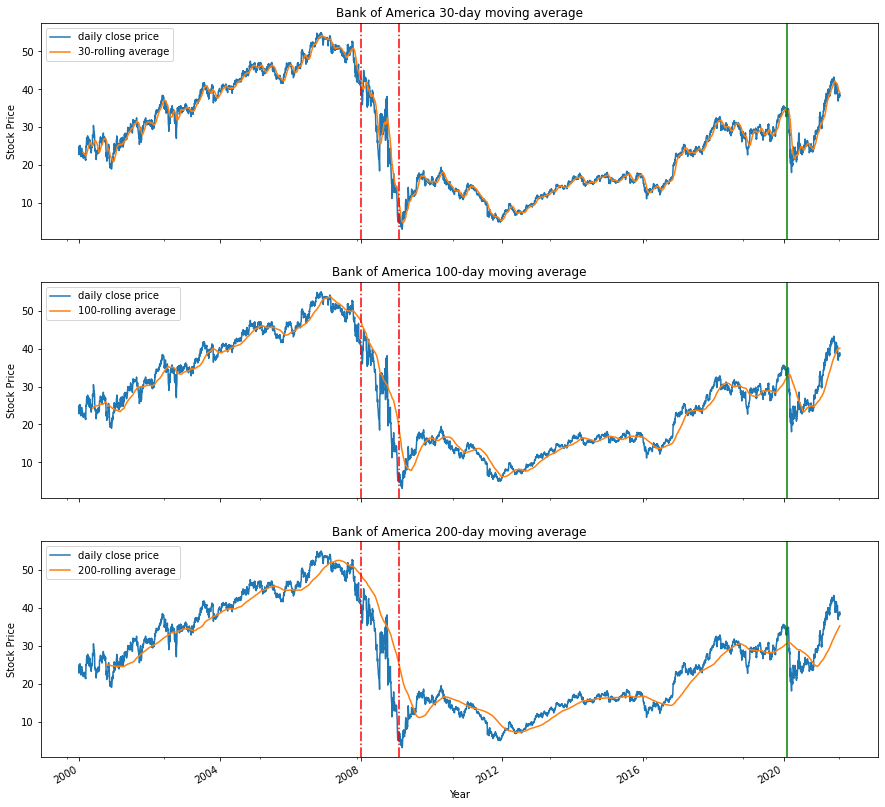

In [ ]:
dayList = [30, 100, 200]


fig, ax = plt.subplots(3, 1, figsize=(15,15),
                       sharex=True)

for index, day in enumerate(dayList):
  BAC['Close'].plot(ax=ax[index])
  BAC['Close'].rolling(day).mean().plot(ax=ax[index])
  ax[index].set_title(f'Bank of America {day}-day moving average')
  ax[index].axvline( '2008-01-01', color="red", linestyle ="-.",)
  ax[index].axvline( '2009-02-01', color="red", linestyle ="-.",)
  ax[index].axvline( '2020-02-01', color="green", linestyle ="-",)
  ax[index].set_xlabel("Year")
  ax[index].set_ylabel("Stock Price")
  ax[index].legend(['daily close price', f'{day}-rolling average'])

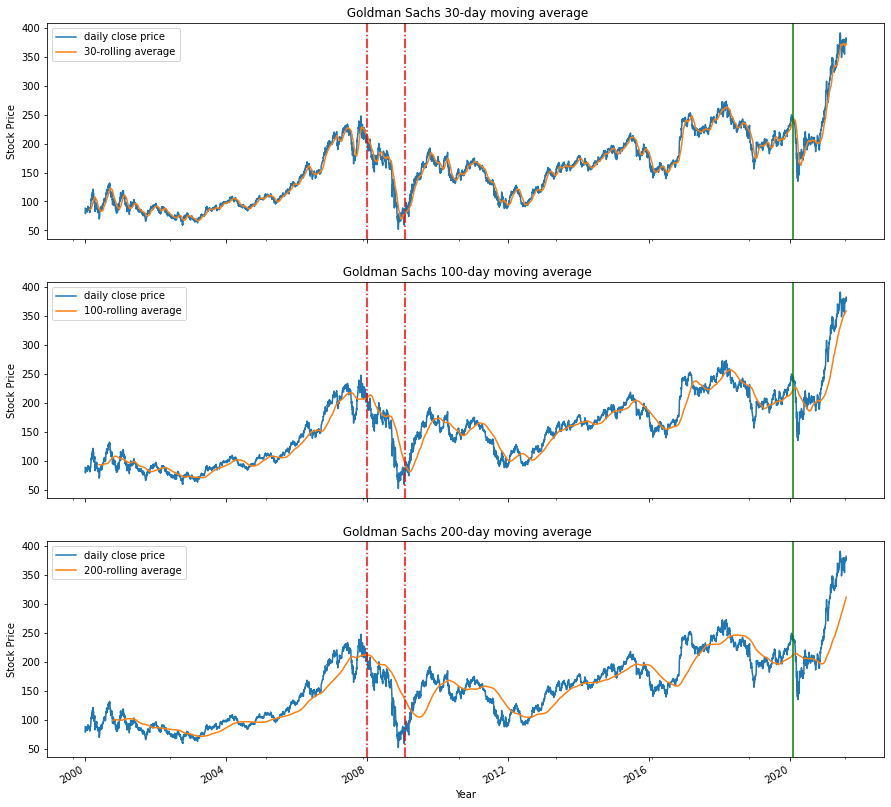

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15,15),
                       sharex=True)

for index, day in enumerate(dayList):
  GS['Close'].plot(ax=ax[index])
  GS['Close'].rolling(day).mean().plot(ax=ax[index])
  ax[index].set_title(f' Goldman Sachs {day}-day moving average')
  ax[index].axvline( '2008-01-01', color="red", linestyle ="-.",)
  ax[index].axvline( '2009-02-01', color="red", linestyle ="-.",)
  ax[index].axvline( '2020-02-01', color="green", linestyle ="-",)
  ax[index].set_xlabel("Year")
  ax[index].set_ylabel("Stock Price")
  ax[index].legend(['daily close price', f'{day}-rolling average'])

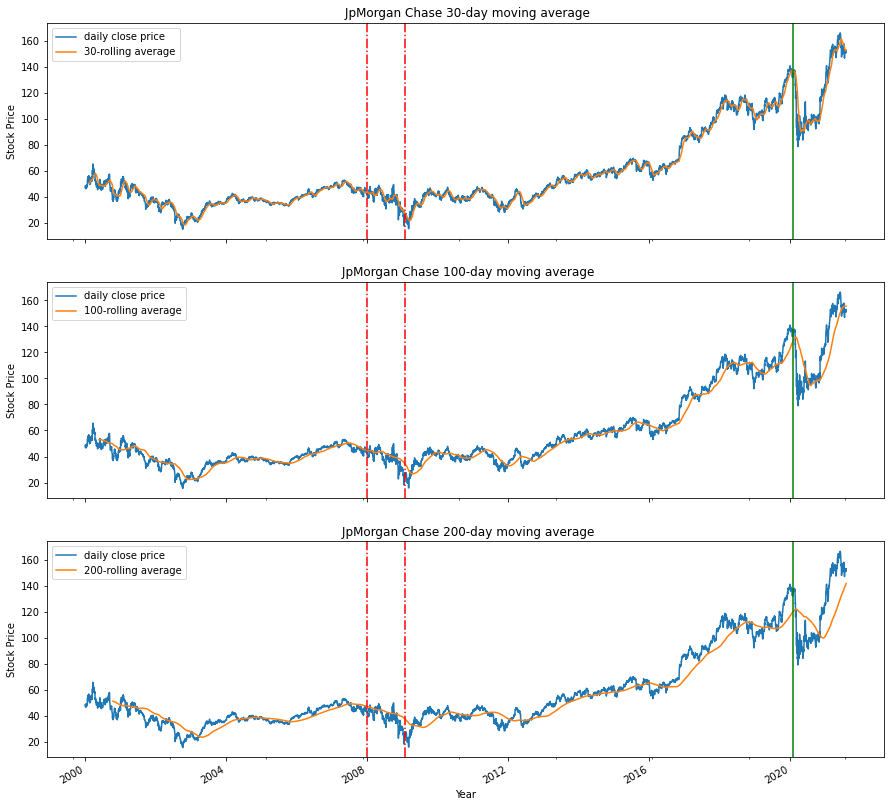

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15,15),
                       sharex=True)

for index, day in enumerate(dayList):
  JPM['Close'].plot(ax=ax[index])
  JPM['Close'].rolling(day).mean().plot(ax=ax[index])
  ax[index].set_title(f' JpMorgan Chase {day}-day moving average')
  ax[index].axvline( '2008-01-01', color="red", linestyle ="-.",)
  ax[index].axvline( '2009-02-01', color="red", linestyle ="-.",)
  ax[index].axvline( '2020-02-01', color="green", linestyle ="-",)
  ax[index].set_xlabel("Year")
  ax[index].set_ylabel("Stock Price")
  ax[index].legend(['daily close price', f'{day}-rolling average'])

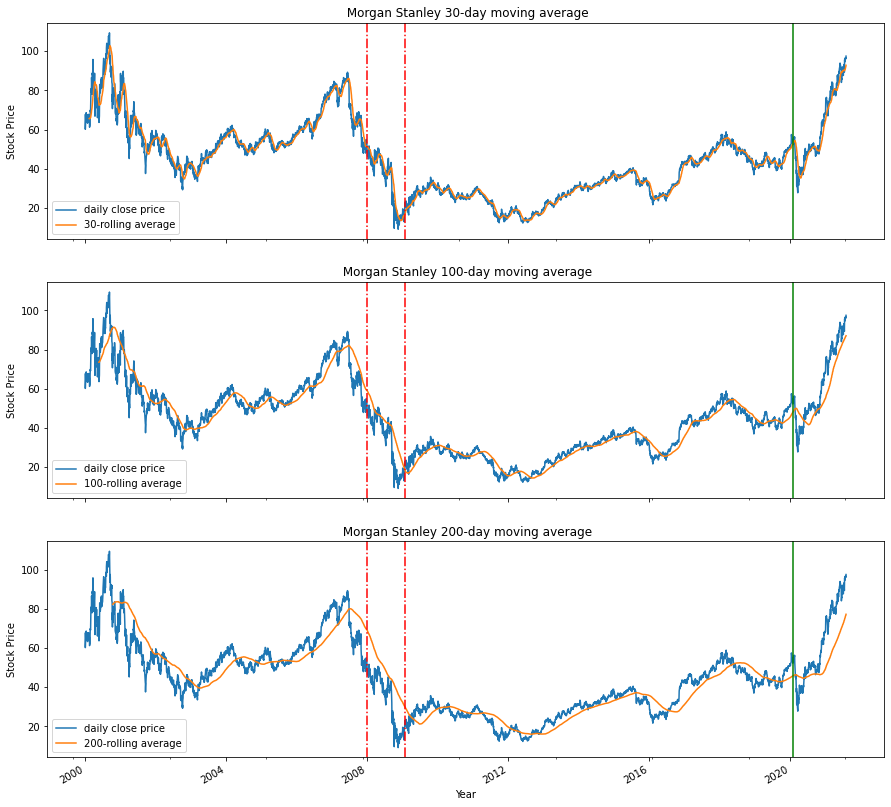

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15,15),
                       sharex=True)

for index, day in enumerate(dayList):
  MS['Close'].plot(ax=ax[index])
  MS['Close'].rolling(day).mean().plot(ax=ax[index])
  ax[index].set_title(f' Morgan Stanley {day}-day moving average')
  ax[index].axvline( '2008-01-01', color="red", linestyle ="-.",)
  ax[index].axvline( '2009-02-01', color="red", linestyle ="-.",)
  ax[index].axvline( '2020-02-01', color="green", linestyle ="-",)
  ax[index].set_xlabel("Year")
  ax[index].set_ylabel("Stock Price")
  ax[index].legend(['daily close price', f'{day}-rolling average'])

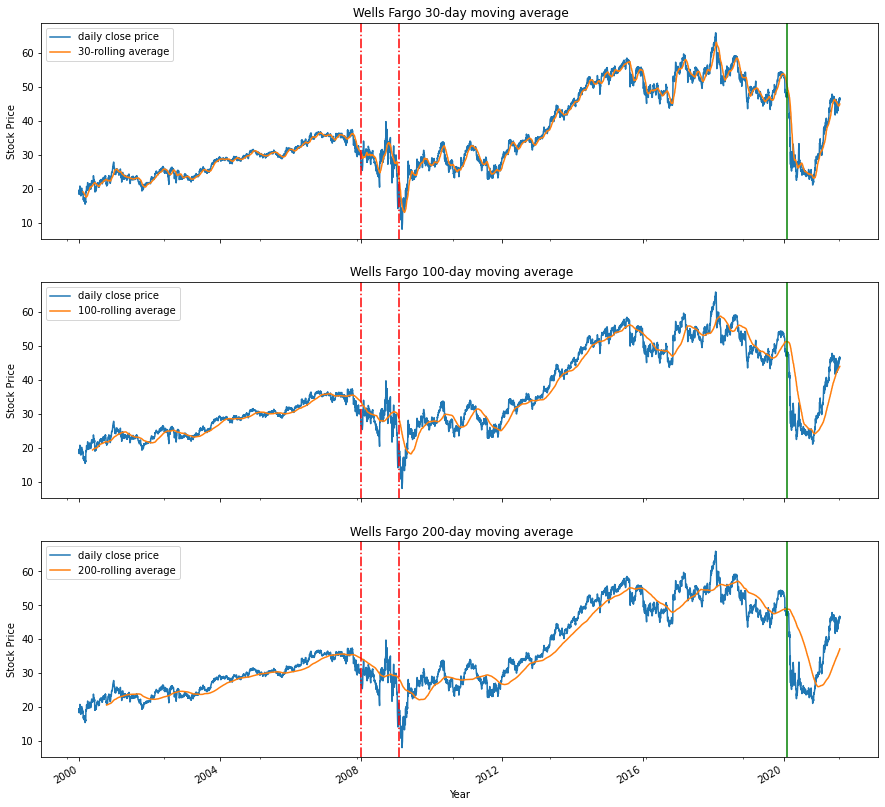

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15,15),
                       sharex=True)

for index, day in enumerate(dayList):
  WFC['Close'].plot(ax=ax[index])
  WFC['Close'].rolling(day).mean().plot(ax=ax[index])
  ax[index].set_title(f' Wells Fargo {day}-day moving average')
  ax[index].axvline( '2008-01-01', color="red", linestyle ="-.",)
  ax[index].axvline( '2009-02-01', color="red", linestyle ="-.",)
  ax[index].axvline( '2020-02-01', color="green", linestyle ="-",)
  ax[index].set_xlabel("Year")
  ax[index].set_ylabel("Stock Price")
  ax[index].legend(['daily close price', f'{day}-rolling average'])

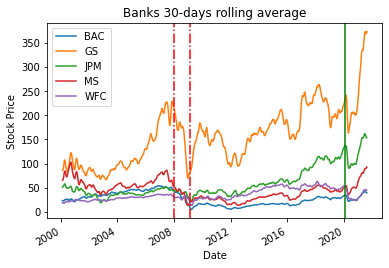

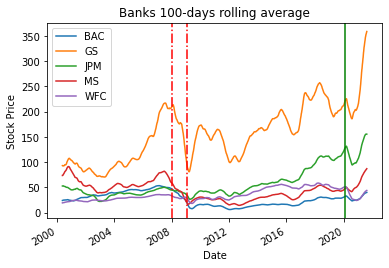

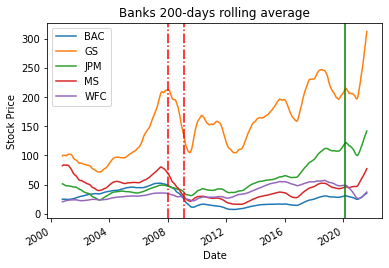

In [ ]:
for index, day in enumerate(dayList):
  closeDF.rolling(day).mean().plot()
  plt.axvline( '2008-01-01', color="red", linestyle ="-.",)
  plt.axvline( '2009-02-01', color="red", linestyle ="-.",)
  plt.axvline( '2020-02-01', color="green", linestyle ="-",)
  plt.ylabel("Stock Price")
  plt.title(f"Banks {day}-days rolling average")

#### 5. Calculate daily rate of change, find ROC for all banks 

In [ ]:
rocDF = pd.DataFrame(BAC['Close'].pct_change())
rocDF['GS'] =  pd.DataFrame(GS['Close'].pct_change())
rocDF['JPM'] =  pd.DataFrame(JPM['Close'].pct_change())
rocDF['MS'] =  pd.DataFrame(MS['Close'].pct_change())
rocDF['WFC'] =  pd.DataFrame(WFC['Close'].pct_change())
rocDF.columns = tickers
rocDF

,BAC,GS,JPM,MS,WFC
Date,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN
2000-01-04,-0.059355,-0.062987,-0.027444,-0.074074,-0.049521
2000-01-05,0.010974,-0.046828,-0.006173,-0.036500,-0.010084
2000-01-06,0.085482,0.042789,0.014197,0.019201,0.044143
2000-01-07,-0.026250,0.003799,0.018373,0.031059,0.017886
...,...,...,...,...,...
2021-07-30,-0.008273,-0.007072,-0.007974,-0.003116,-0.012043
2021-08-02,-0.010428,0.008829,-0.004019,0.002605,-0.003265
2021-08-03,0.015543,0.005738,0.011378,0.003845,0.022712


#### 6. Show ROC for all banks on the same Plot

Text(0, 0.5, 'Per')

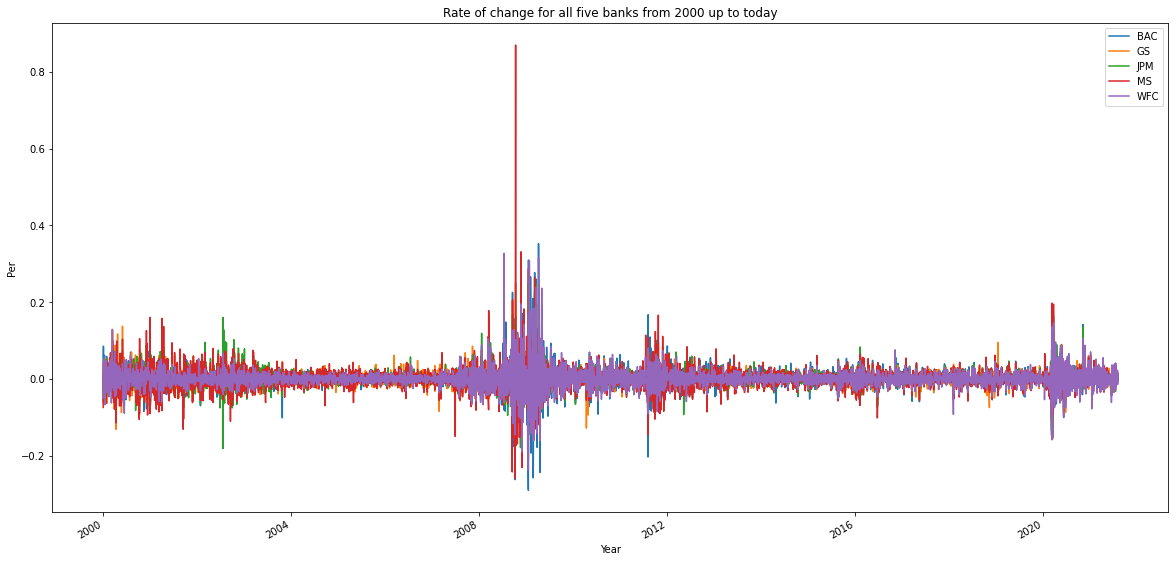

In [ ]:
rocDF.plot(figsize=(20,10))
plt.title("Rate of change for all five banks from 2000 up to today")
plt.xlabel("Year")
plt.ylabel("Per")

## *Part 4*
#### 7. Explore days with highest change (idxmax and idxmin)

In [ ]:
# # rocDF['GS'].idxmax().date()
# rocDF.loc[(rocDF['GS'].idxmax(),"GS")]


def bankIDX(name,df):
  lowDate = df[name].idxmin()
  lowValue = df.loc[(lowDate,name)]
  highDate = df[name].idxmax()
  highValue = df.loc[(highDate,name)]
  dict = {'' : ['Highest', 'Lowest'],
          'Days' : [highDate, lowDate],
          'Values' : [highValue, lowValue]}
  df = pd.DataFrame(dict)
  display(df)


#### 7.1 Bank of America

In [ ]:
bankIDX("BAC",rocDF)

,,Days,Values
0,Highest,2009-04-09,0.352691
1,Lowest,2009-01-20,-0.289694


#### 7.2 Goldman Sachs

In [ ]:
bankIDX("GS",rocDF)

,,Days,Values
0,Highest,2008-11-24,0.264678
1,Lowest,2009-01-20,-0.189596


#### 7.3 JPMorgan Chase

In [ ]:
bankIDX("JPM",rocDF)

,,Days,Values
0,Highest,2009-01-21,0.250967
1,Lowest,2009-01-20,-0.207274


#### 7.4 Morgan Stanley

In [ ]:
bankIDX("MS",rocDF)

,,Days,Values
0,Highest,2008-10-13,0.869835
1,Lowest,2008-10-09,-0.258929


#### 7.5 Wells Fargo

In [ ]:
bankIDX("WFC",rocDF)

,,Days,Values
0,Highest,2008-07-16,0.327645
1,Lowest,2009-01-20,-0.238223


#### 8. Tell a story => Financial crisis

#### 9. Correlation between stocks

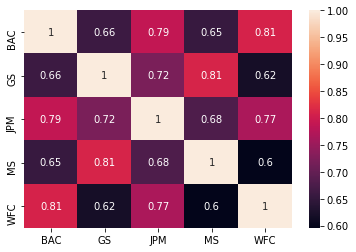

In [ ]:
sns.heatmap(rocDF.corr(), annot=True)

#### 10. Explore volatility of bank stocks 





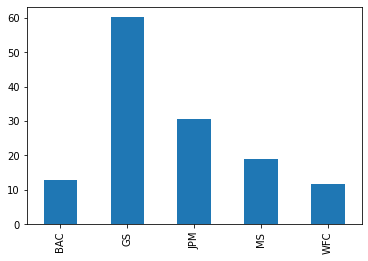

In [ ]:
closeDF.std().plot(kind="bar")
# ref: https://www.buyupside.com/alphavantagelive/volatilitycalculatorcomputeav.php?symbol=BAC&numberyears=21.7&submit=Calculate+Volatility
# https://www.buyupside.com/alphavantagelive/volatilitycalculatorcomputeav.php?symbol=GS&numberyears=21.7&submit=Calculate+Volatility
# https://www.buyupside.com/alphavantagelive/volatilitycalculatorcomputeav.php?symbol=JPM&numberyears=21.7&submit=Calculate+Volatility
# https://www.buyupside.com/alphavantagelive/volatilitycalculatorcomputeav.php?symbol=MS&numberyears=21.7&submit=Calculate+Volatility
# https://www.buyupside.com/alphavantagelive/volatilitycalculatorcomputeav.php?symbol=WFC&numberyears=21.7&submit=Calculate+Volatility

In [44]:
%cd ..
%ls
%cd content
%cd sample_data
%ls




/content
sample_data/
[Errno 2] No such file or directory: 'content'
/content
/content/sample_data
anscombe.json*                data_challenge.html   mnist_train_small.csv
california_housing_test.csv   data_challenge.ipynb  README.md*
california_housing_train.csv  mnist_test.csv


In [46]:
!pip install -e .
!apt-get install pandoc
!apt-get update
!apt-get install inkscape
!add-apt-repository universe
!add-apt-repository ppa:inkscape.dev/stable
!apt-get update
!apt install inkscape
!apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended


ERROR: File "setup.py" or "setup.cfg" not found. Directory cannot be installed in editable mode: /content/sample_data
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [62.9 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [47]:
!jupyter nbconvert --to pdf data_challenge.ipynb

[NbConvertApp] Converting notebook data_challenge.ipynb to pdf
[NbConvertApp] Support files will be in data_challenge_files/
[NbConvertApp] Making directory ./data_challenge_files
[NbConvertApp] Making directory ./data_challenge_files
[NbConvertApp] Making directory ./data_challenge_files
[NbConvertApp] Making directory ./data_challenge_files
[NbConvertApp] Making directory ./data_challenge_files
[NbConvertApp] Making directory ./data_challenge_files
[NbConvertApp] Making directory ./data_challenge_files
[NbConvertApp] Making directory ./data_challenge_files
[NbConvertApp] Making directory ./data_challenge_files
[NbConvertApp] Making directory ./data_challenge_files
[NbConvertApp] Making directory ./data_challenge_files
[NbConvertApp] Writing 61374 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had proble